### Read the datafiles 

In [ ]:
professors = pd.DataFrame.from_csv("professors.csv", encoding='utf-8') #this one only last 2 years of citations

In [47]:
professors = professors.rename(index=str, columns={"Years Active": "Years_Active"})

In [ ]:
prof_2 = pd.DataFrame.from_csv("professors (1).csv", encoding='utf-8') #this one only last 5 years of citations

In [50]:
prof_2 = prof_2.rename(index=str, columns={"Years Active": "Years_Active"})

### Initial Linear Regression Tests

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns
import requests
import statsmodels.formula.api as sm

# pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (12, 12)

In [7]:
#We are trying to predict "Current_Citations" from "Last Citations"
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=professors).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.791e+06
Date:                Mon, 09 May 2016   Prob (F-statistic):               0.00
Time:                        16:42:32   Log-Likelihood:            -3.2477e+05
No. Observations:               48374   AIC:                         6.495e+05
Df Residuals:                   48372   BIC:                         6.496e+05
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         28.1291      0.996     28.243      0.000        26.177    30.081
Last_citations     1.0311      0.001   1338.164      0.000         1.030     1.033
==============================================================================
Omnibus:                    72255.503   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        257235124.322
Skew:                          -8.381   Prob(JB):                         0.00
Kurtosis:                     359.850   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Testing Model with just Last citations on Individual Professors: Paulo Blikstein - 13 Years Active

In [87]:
ind_prof = professors[:14]

In [91]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=ind_prof).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     45.79
Date:                Mon, 09 May 2016   Prob (F-statistic):           3.09e-05
Time:                        18:39:51   Log-Likelihood:                -66.335
No. Observations:                  13   AIC:                             136.7
Df Residuals:                      11   BIC:                             137.8
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         20.8599     16.480      1.266      0.232       -15.413    57.132
Last_citations     0.9584      0.142      6.767      0.000         0.647     1.270
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.502
Skew:                           0.076   Prob(JB):                        0.778
Kurtosis:                       2.049   Cond. No.                         160.
==============================================================================
"""

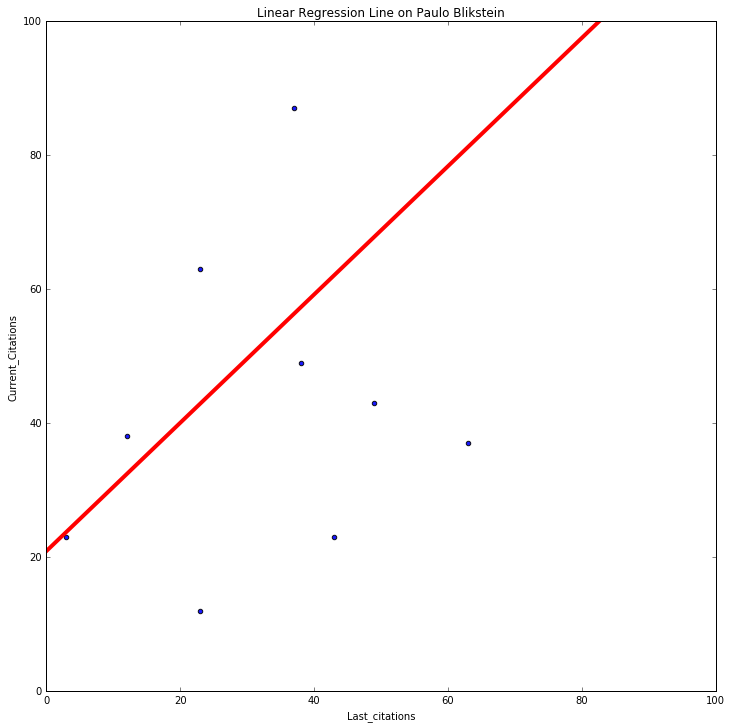

In [16]:
#scatter plot and linear regression line

ax = plt.gca()
# Plots the scatter plot
ax2 = ind_prof.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,100), ylim=(0,100), alpha=0.9, ax = ax)

b = model_last_year.params["Intercept"]
a = model_last_year.params["Last_citations"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)
plt.title("Linear Regression Line on Paulo Blikstein")

###### Now we plot the predictions for Paulo Blikstein

In [17]:
ind_prof["Prediction"] = pd.to_numeric(model_last_year.fittedvalues).astype(int)
#demo_table.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


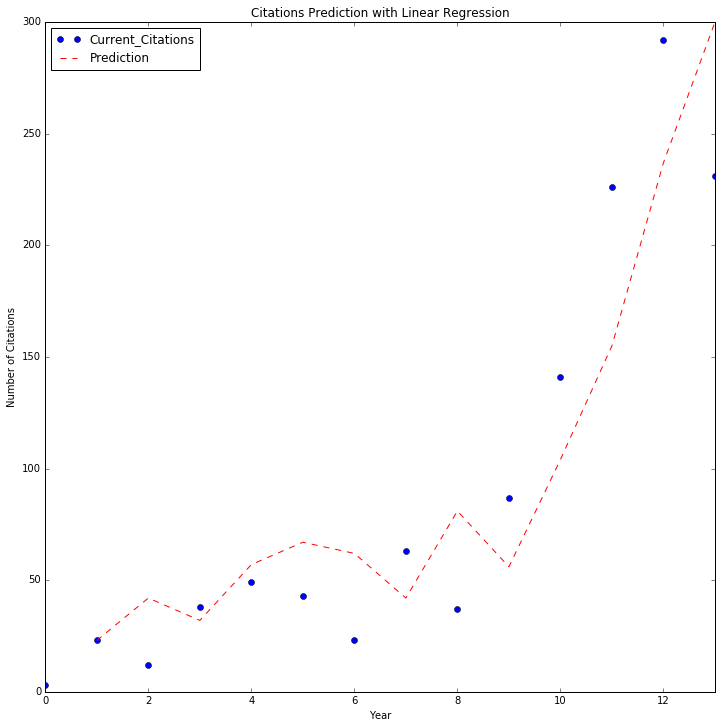

In [18]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction with Linear Regression")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


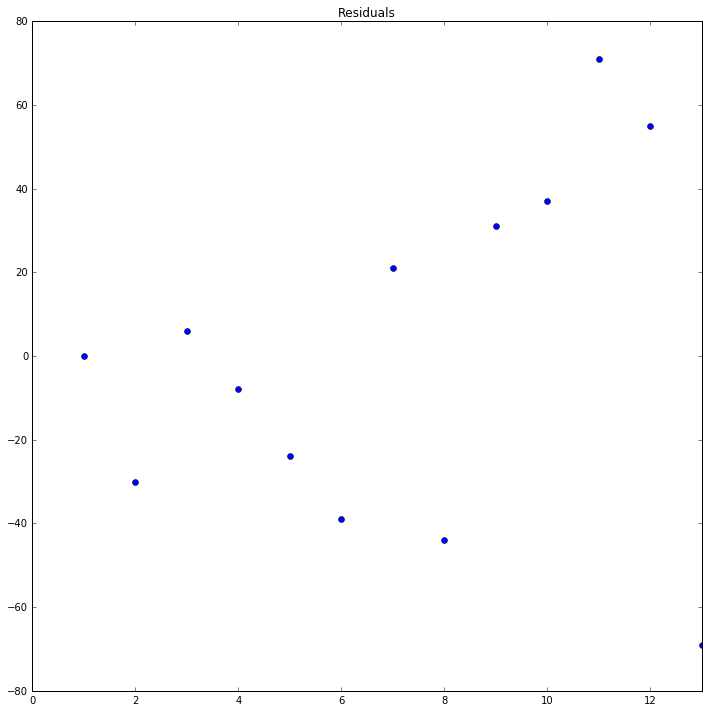

In [19]:
ind_prof["Residuals"] = ind_prof["Current_Citations"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

In [20]:
# Compare predictions and forecast medals for the future
pred = {"Last_citations":231}
print "This model predicts the professors will publish:", int(model_last_year.predict(pred)[0])

This model predicts the professors will publish: 242


In [39]:
pred = {"Last_citations":292}
print int(model_last_year.predict(pred)[0])
pred = {"Last_citations":226}
print int(model_last_year.predict(pred)[0])
pred = {"Last_citations":141}
print int(model_last_year.predict(pred)[0])
pred = {"Last_citations":87}
print int(model_last_year.predict(pred)[0])

300
237
155
104


#### Testing Linear Regression with professor with more than 20 years experience: Robert Anderson - 33 Years Active

In [25]:
ind_prof = professors[54:88]

In [22]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=ind_prof).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     388.1
Date:                Mon, 09 May 2016   Prob (F-statistic):           4.35e-19
Time:                        16:49:48   Log-Likelihood:                -190.92
No. Observations:                  33   AIC:                             385.8
Df Residuals:                      31   BIC:                             388.8
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -11.6485     26.013     -0.448      0.657       -64.703    41.406
Last_citations     1.1319      0.057     19.701      0.000         1.015     1.249
==============================================================================
Omnibus:                       24.429   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.168
Skew:                           1.449   Prob(JB):                     2.60e-15
Kurtosis:                       9.360   Cond. No.                         833.
==============================================================================
"""

In [23]:
ind_prof["Prediction"] = pd.to_numeric(model_last_year.fittedvalues).astype(int)
ind_prof.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


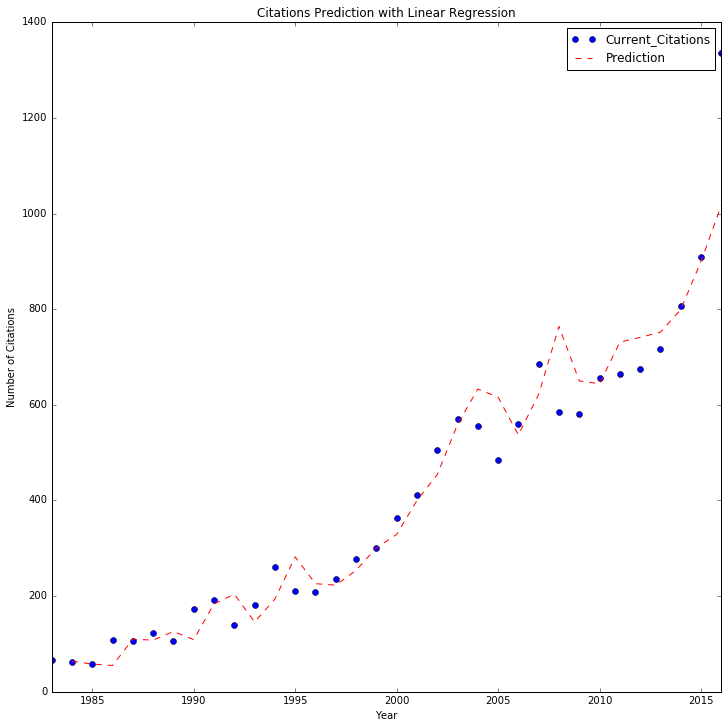

In [24]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction with Linear Regression")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


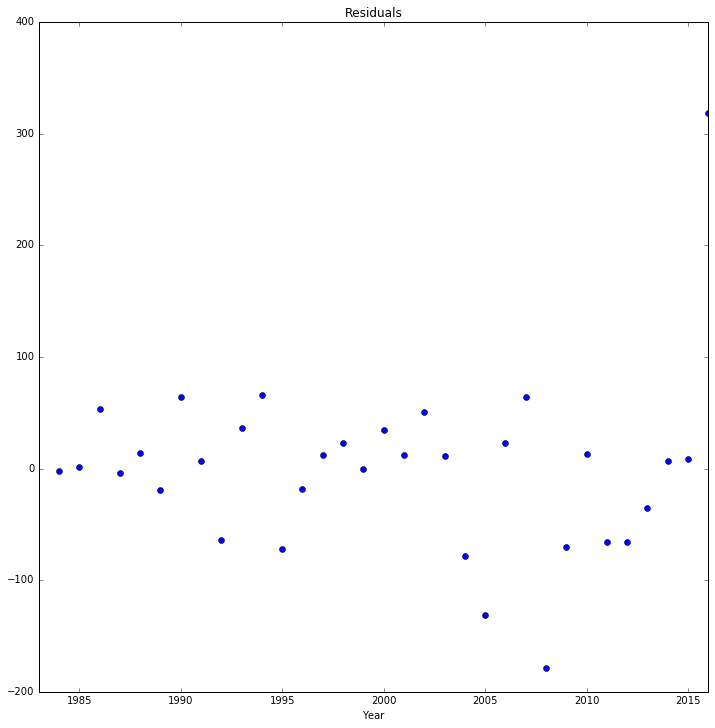

In [117]:
ind_prof["Residuals"] = ind_prof["Current_Citations"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

##### Another professor with less experience: Yiping Zhu - 6 Years Active

In [124]:
ind_prof = professors[532:539]

In [125]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=ind_prof).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3.658
Date:                Sun, 08 May 2016   Prob (F-statistic):              0.128
Time:                        23:24:01   Log-Likelihood:                -24.151
No. Observations:                   6   AIC:                             52.30
Df Residuals:                       4   BIC:                             51.88
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         12.5683     10.535      1.193      0.299       -16.681    41.817
Last_citations     0.8267      0.432      1.913      0.128        -0.373     2.027
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.640
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.662
Skew:                           0.400   Prob(JB):                        0.718
Kurtosis:                       1.582   Cond. No.                         37.9
==============================================================================
"""

In [126]:
ind_prof["Prediction"] = pd.to_numeric(model_last_year.fittedvalues).astype(int)
ind_prof.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


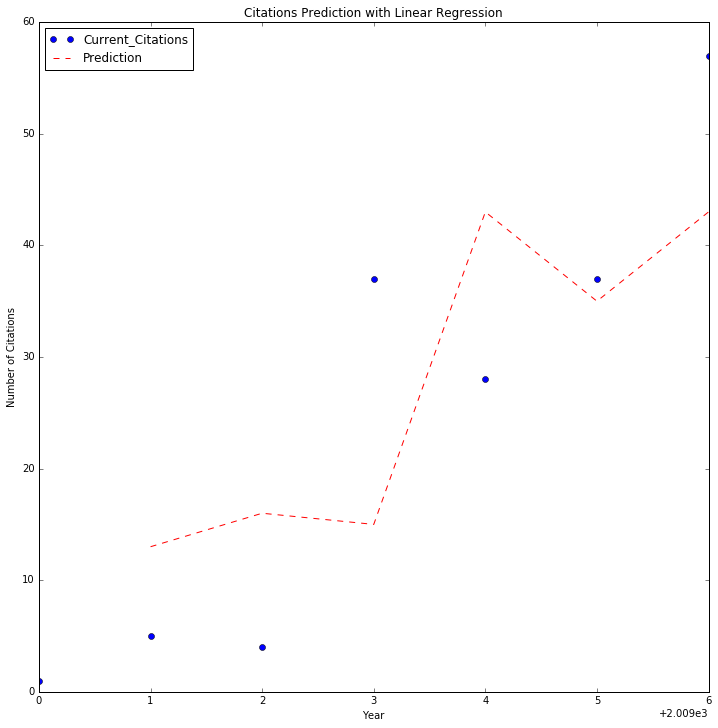

In [127]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction with Linear Regression")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


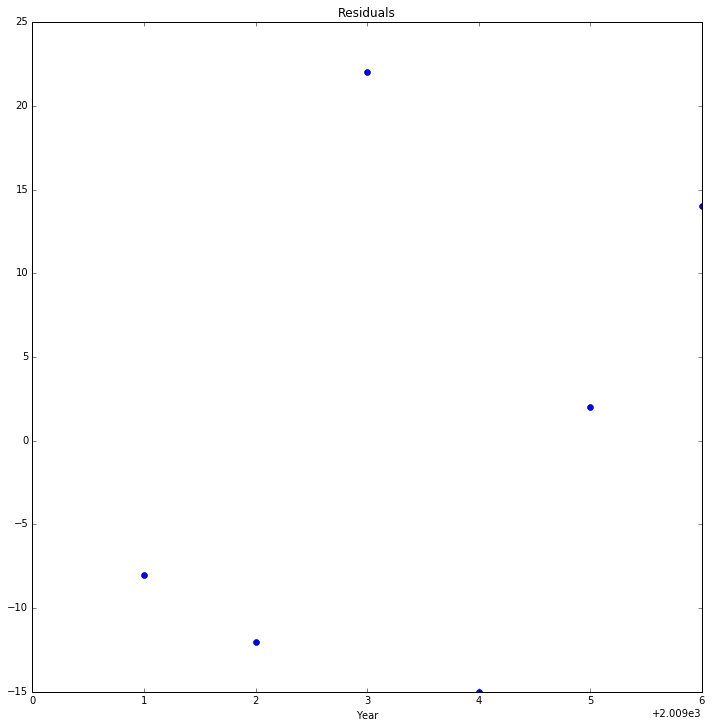

In [128]:
ind_prof["Residuals"] = ind_prof["Current_Citations"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

##### Testing Linear Regression with Years_Active and Age - not as accurate

In [40]:
model_last_year = sm.ols(formula="Current_Citations ~ Years_Active + Age", data=ind_prof).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     365.7
Date:                Mon, 09 May 2016   Prob (F-statistic):           9.10e-23
Time:                        17:00:18   Log-Likelihood:                -205.72
No. Observations:                  34   AIC:                             415.4
Df Residuals:                      32   BIC:                             418.5
Df Model:                           2                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.0465      0.033     -1.427      0.163        -0.113     0.020
Years_Active    -1.5338      1.075     -1.427      0.163        -3.724     0.656
Age             27.8031      1.850     15.028      0.000        24.035    31.572
==============================================================================
Omnibus:                       43.124   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.778
Skew:                           2.716   Prob(JB):                     4.56e-41
Kurtosis:                      13.081   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is -6.41e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
ind_prof["Prediction"] = pd.to_numeric(model_last_year.fittedvalues).astype(int)
#ind_prof.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


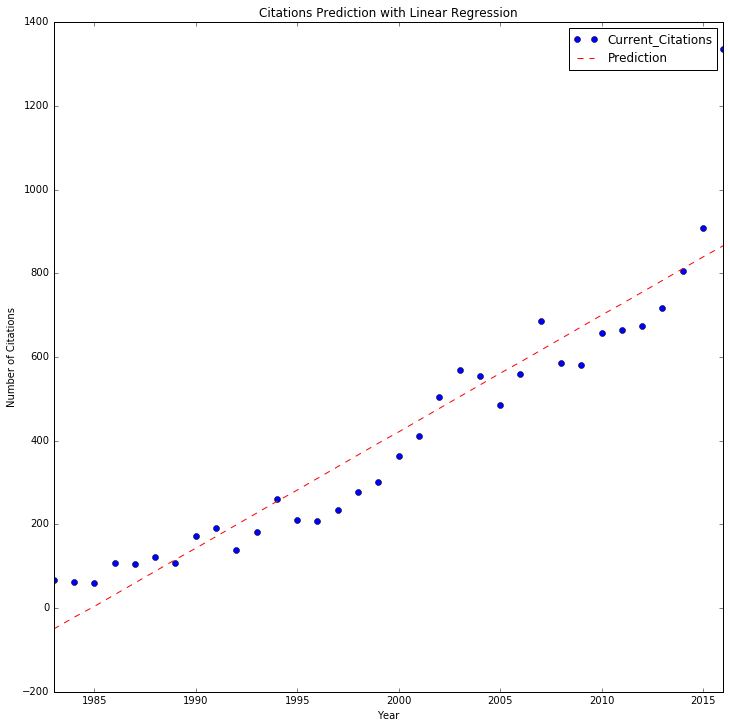

In [42]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction with Linear Regression")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


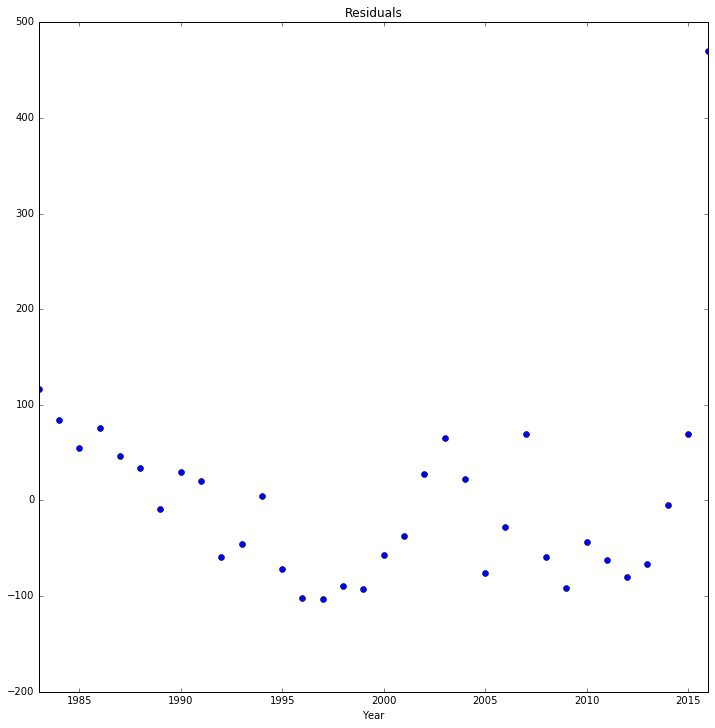

In [31]:
ind_prof["Residuals"] = ind_prof["Current_Citations"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

### Linear Regression with All Professors with 10-20 years experience

In [45]:
mid_exp = professors[professors["Years Active"] > 9]
mid_exp = mid_exp[mid_exp["Years Active"] < 21]

In [48]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=mid_exp).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 5.599e+05
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        22:33:28   Log-Likelihood:            -1.2865e+05
No. Observations:               19402   AIC:                         2.573e+05
Df Residuals:                   19400   BIC:                         2.573e+05
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         21.6822      1.454     14.912      0.000        18.832    24.532
Last_citations     1.0715      0.001    748.258      0.000         1.069     1.074
==============================================================================
Omnibus:                    16391.017   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25379714.634
Skew:                          -2.734   Prob(JB):                         0.00
Kurtosis:                     180.100   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

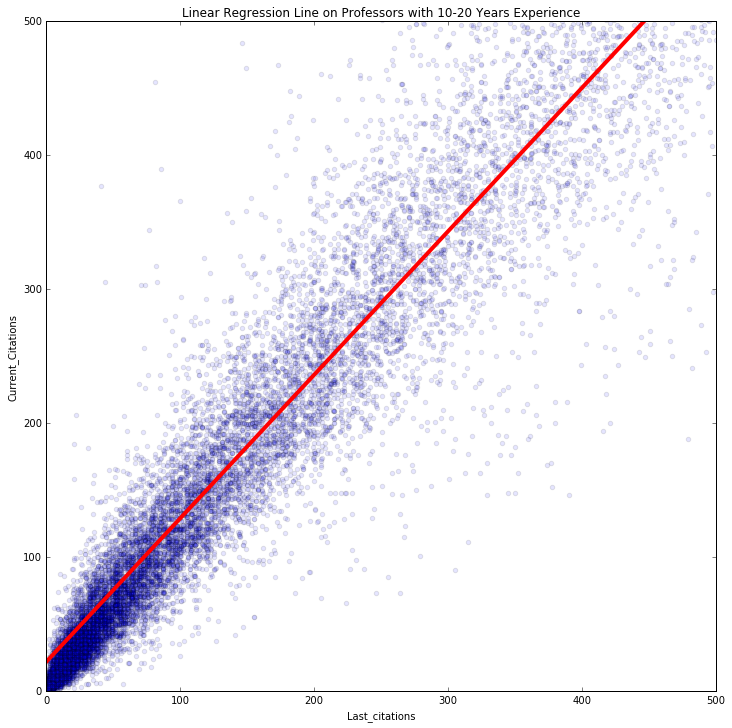

In [54]:

ax = plt.gca()
# Plots the scatter plot
ax2 = mid_exp.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,500), ylim=(0,500), alpha=0.1, ax = ax)

# Run the regression and get the parameters
result = sm.ols(formula="Current_Citations ~ Last_citations", data=mid_exp).fit()
b = result.params["Intercept"]
a = result.params["Last_citations"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)
plt.title("Linear Regression Line on Professors with 10-20 Years Experience")

### Linear Regression with Professors with Less than 10 years Experience

In [55]:
less_exp = professors[professors["Years Active"] < 10]

In [57]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=less_exp).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 5.926e+04
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        22:37:21   Log-Likelihood:                -22439.
No. Observations:                4058   AIC:                         4.488e+04
Df Residuals:                    4056   BIC:                         4.490e+04
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          9.4310      1.038      9.090      0.000         7.397    11.465
Last_citations     1.1754      0.005    243.435      0.000         1.166     1.185
==============================================================================
Omnibus:                     1412.384   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313668.619
Skew:                           0.405   Prob(JB):                         0.00
Kurtosis:                      46.063   Cond. No.                         233.
==============================================================================
"""

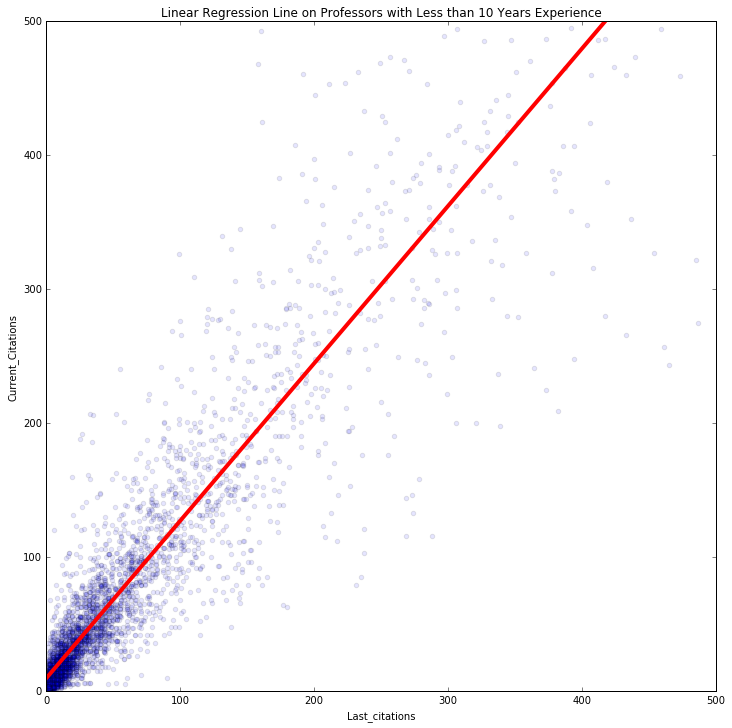

In [59]:
ax = plt.gca()
# Plots the scatter plot
ax2 = less_exp.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,500), ylim=(0,500), alpha=0.1, ax = ax)

# Run the regression and get the parameters
result = sm.ols(formula="Current_Citations ~ Last_citations", data=less_exp).fit()
b = result.params["Intercept"]
a = result.params["Last_citations"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)
plt.title("Linear Regression Line on Professors with Less than 10 Years Experience")

### Linear Regression with Professors with more than 20 Years Experience

In [60]:
more_exp = professors[professors["Years Active"] > 20]

In [61]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations", data=more_exp).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.037e+06
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        22:41:23   Log-Likelihood:            -1.6978e+05
No. Observations:               24914   AIC:                         3.396e+05
Df Residuals:                   24912   BIC:                         3.396e+05
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         29.9322      1.559     19.199      0.000        26.876    32.988
Last_citations     1.0178      0.001   1018.461      0.000         1.016     1.020
==============================================================================
Omnibus:                    41514.153   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129118220.822
Skew:                         -10.726   Prob(JB):                         0.00
Kurtosis:                     355.024   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

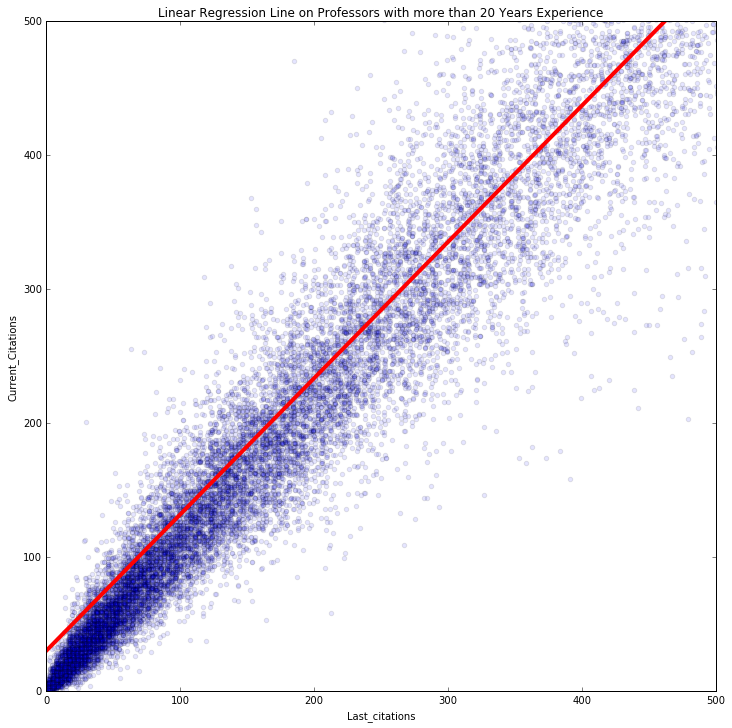

In [64]:
ax = plt.gca()
# Plots the scatter plot
ax2 = more_exp.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,500), ylim=(0,500), alpha=0.1, ax = ax)

# Run the regression and get the parameters
result = sm.ols(formula="Current_Citations ~ Last_citations", data=more_exp).fit()
b = result.params["Intercept"]
a = result.params["Last_citations"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)
plt.title("Linear Regression Line on Professors with more than 20 Years Experience")

### Model with more variables - with last five years

In [38]:
result = sm.ols(formula="Current_Citations ~ Last_citations + Last2_citations + Last3_citations + Last4_citations + Last5_citations", data=prof_2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.549e+05
Date:                Mon, 09 May 2016   Prob (F-statistic):               0.00
Time:                        16:56:35   Log-Likelihood:            -2.4796e+05
No. Observations:               37038   AIC:                         4.959e+05
Df Residuals:                   37032   BIC:                         4.960e+05
Df Model:                           5                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          17.1569      1.151     14.903      0.000        14.900    19.413
Last_citations      1.4691      0.008    176.092      0.000         1.453     1.485
Last2_citations     0.0415      0.014      2.882      0.004         0.013     0.070
Last3_citations    -0.4935      0.015    -32.139      0.000        -0.524    -0.463
Last4_citations    -0.1015      0.017     -6.039      0.000        -0.134    -0.069
Last5_citations     0.0279      0.012      2.380      0.017         0.005     0.051
==============================================================================
Omnibus:                    50105.449   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         80223489.753
Skew:                          -7.037   Prob(JB):                         0.00
Kurtosis:                     230.564   Cond. No.                     3.20e+03
==============================================================================

Warnings:
[1] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

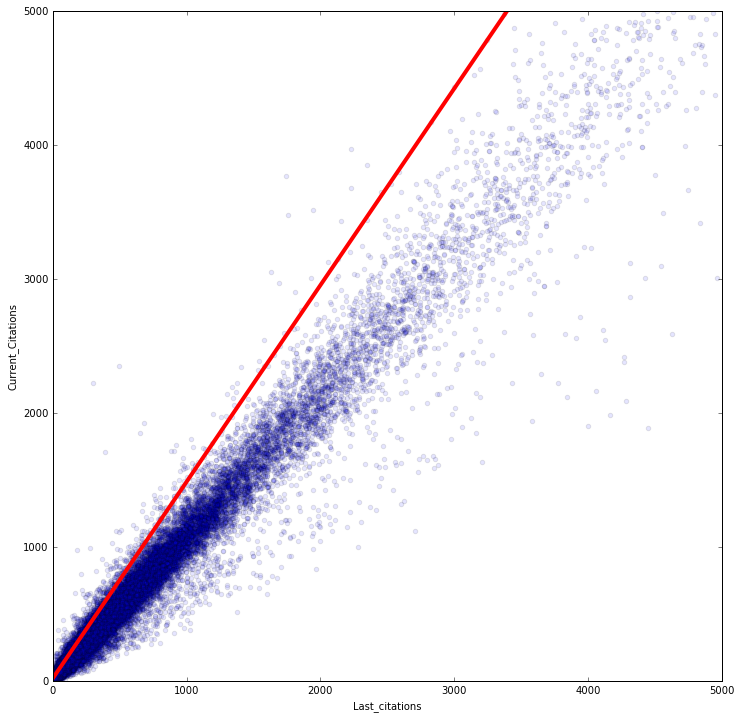

In [39]:
ax = plt.gca()
# Plots the scatter plot
ax2 = prof_2.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,5000), ylim=(0,5000), alpha=0.1, ax = ax)

# Run the regression and get the parameters
result = sm.ols(formula="Current_Citations ~ Last_citations + Last2_citations + Last3_citations + Last4_citations + Last5_citations", data=prof_2).fit()
b = result.params["Intercept"]
a = result.params["Last_citations"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)

#### Testing Multiple linear regression on individual professor: Robert Anderson

In [145]:
ind_prof = prof_2[54:88]

In [137]:
model = sm.ols(formula="Current_Citations ~ Last_citations + Last2_citations + Last3_citations +\
                                Last4_citations", data=ind_prof).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     76.55
Date:                Sun, 08 May 2016   Prob (F-statistic):           1.18e-13
Time:                        23:34:41   Log-Likelihood:                -173.04
No. Observations:                  30   AIC:                             356.1
Df Residuals:                      25   BIC:                             363.1
Df Model:                           4                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         -25.1621     31.892     -0.789      0.438       -90.845    40.520
Last_citations      1.5306      0.357      4.293      0.000         0.796     2.265
Last2_citations    -0.6606      0.449     -1.472      0.153        -1.585     0.263
Last3_citations     0.7497      0.451      1.662      0.109        -0.179     1.679
Last4_citations    -0.4984      0.384     -1.298      0.206        -1.289     0.292
==============================================================================
Omnibus:                       23.088   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.006
Skew:                           1.515   Prob(JB):                     5.09e-12
Kurtosis:                       8.694   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
ind_prof["Prediction"] = pd.to_numeric(model.fittedvalues).astype(int)
ind_prof.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


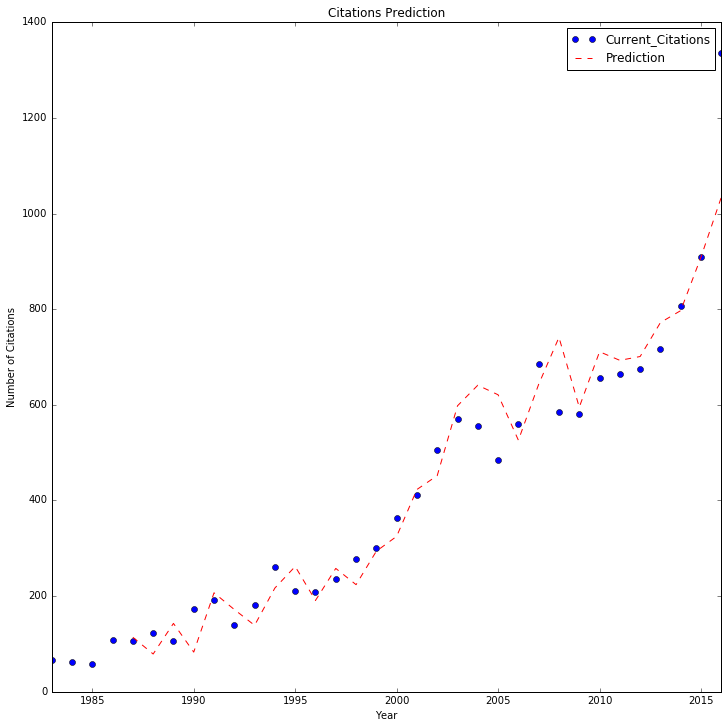

In [139]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


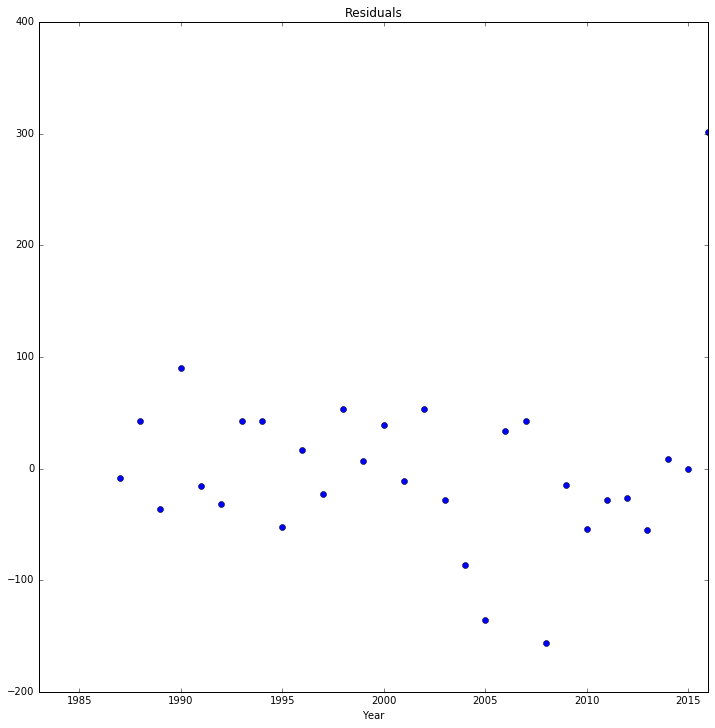

In [140]:
ind_prof["Residuals"] = ind_prof["Current_Citations"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

### Model with Last 2 years

In [146]:
model_last_year = sm.ols(formula="Current_Citations ~ Last_citations + Last2_citations", data=professors).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.032e+06
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        23:42:48   Log-Likelihood:            -3.0182e+05
No. Observations:               45461   AIC:                         6.036e+05
Df Residuals:                   45458   BIC:                         6.037e+05
Df Model:                           2                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          18.4721      0.964     19.153      0.000        16.582    20.362
Last_citations      1.7000      0.007    258.752      0.000         1.687     1.713
Last2_citations    -0.7220      0.007   -102.481      0.000        -0.736    -0.708
==============================================================================
Omnibus:                    65404.916   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        141109393.336
Skew:                          -7.905   Prob(JB):                         0.00
Kurtosis:                     275.480   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

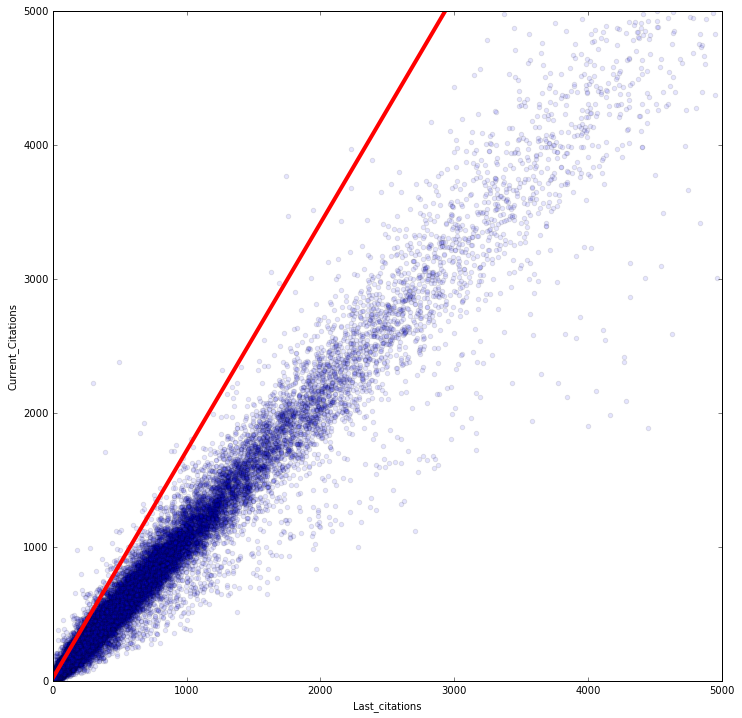

In [149]:
#scatter plot of Last2 citations and Last citations

ax = plt.gca()
# Plots the scatter plot
ax2 = professors.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,5000), ylim=(0,5000), alpha=0.1, ax = ax)

# Run the regression and get the parameters
import statsmodels.formula.api as sm
result = sm.ols(formula="Current_Citations ~ Last_citations + Last2_citations", data=professors).fit()
b = result.params["Intercept"]
a = result.params["Last_citations"]

# Plot the regression fit line into the scatterplot
import numpy as np
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)

In [63]:
ind_prof = prof_2[54:88]

In [158]:
model = sm.ols(formula="Current_Citations ~ Last_citations + Years_Active", data=ind_prof).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     631.5
Date:                Sun, 08 May 2016   Prob (F-statistic):           7.61e-26
Time:                        23:47:06   Log-Likelihood:                -190.92
No. Observations:                  33   AIC:                             385.8
Df Residuals:                      31   BIC:                             388.8
Df Model:                           2                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.0107      0.024     -0.448      0.657        -0.059     0.038
Last_citations     1.1319      0.057     19.701      0.000         1.015     1.249
Years_Active      -0.3527      0.788     -0.448      0.657        -1.959     1.254
==============================================================================
Omnibus:                       24.429   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.168
Skew:                           1.449   Prob(JB):                     2.60e-15
Kurtosis:                       9.360   Cond. No.                     1.73e+10
==============================================================================

Warnings:
[1] The smallest eigenvalue is 2.28e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:
ind_prof["Prediction"] = pd.to_numeric(model.fittedvalues).astype(int)
#demo_table.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


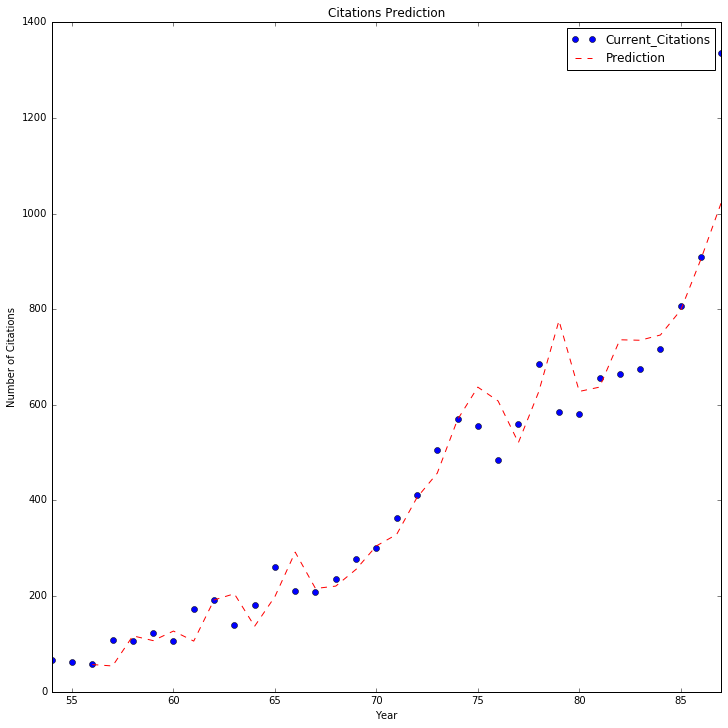

In [153]:
# Plotting the actual data and the prediction
ind_prof[["Current_Citations","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Citations Prediction")

### Testing Linear Regression with the CHANGE in citations

In [56]:
professors["Change1"] = professors['Last_citations'] - professors['Last2_citations'].shift()
professors["Change2"] = professors['Current_Citations'] - professors['Last_citations'].shift()

In [57]:
professors

,Name,Start,Years_Active,Year,Current_Citations,Age,Last_citations,Last2_citations,Change1,Change2
0,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2003,3,0,NaN,NaN,NaN,NaN
1,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2004,23,1,3,NaN,NaN,NaN
2,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2005,12,2,23,3,NaN,9
3,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2006,38,3,12,23,9,15
4,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2007,49,4,38,12,15,37
5,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2008,43,5,49,38,37,5
6,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2009,23,6,43,49,5,-26
7,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2010,63,7,23,43,-26,20
8,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2011,37,8,63,23,20,14
9,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2012,87,9,37,63,14,24


In [61]:
model_last_year = sm.ols(formula="Change2 ~ Change1", data=professors).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Change2   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                 6.309e+04
Date:                Mon, 09 May 2016   Prob (F-statistic):               0.00
Time:                        17:31:51   Log-Likelihood:            -2.8638e+05
No. Observations:               42594   AIC:                         5.728e+05
Df Residuals:                   42592   BIC:                         5.728e+05
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6040      1.061      1.512      0.130        -0.475     3.683
Change1        0.9116      0.004    251.167      0.000         0.904     0.919
==============================================================================
Omnibus:                    67572.061   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        175688281.108
Skew:                          -9.698   Prob(JB):                         0.00
Kurtosis:                     317.033   Cond. No.                         318.
==============================================================================
"""

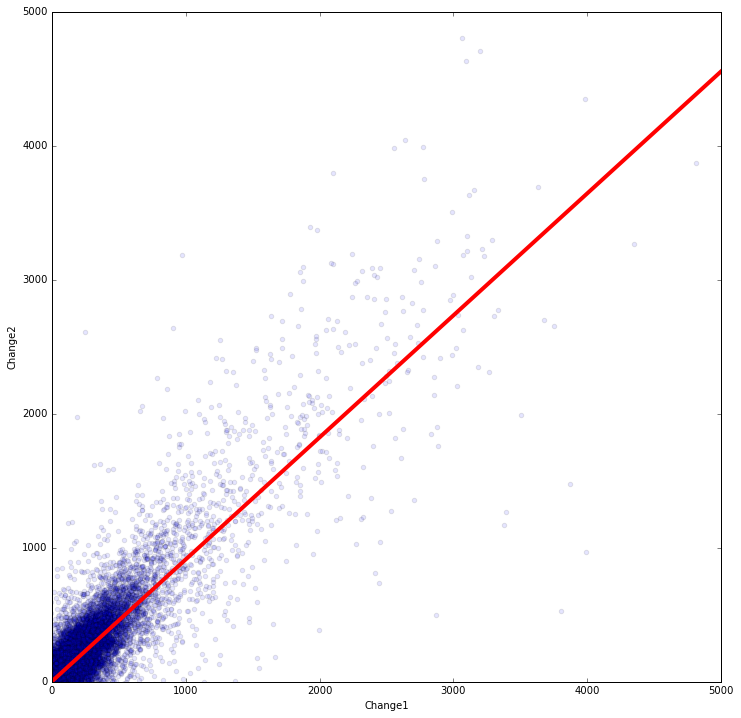

In [62]:
ax = plt.gca()
# Plots the scatter plot
ax2 = professors.plot(kind='scatter', x='Change1', y='Change2', xlim=(0,5000), ylim=(0,5000), alpha=0.1, ax = ax)

# Run the regression and get the parameters
b = model_last_year.params["Intercept"]
a = model_last_year.params["Change1"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)

####Testing the change model with Robert Anderson - Professors with 33 years experience.

In [65]:
ind_prof = professors[54:88]

In [71]:
model = sm.ols(formula="Change2 ~ Change1", data=ind_prof).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Change2   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     5.354
Date:                Mon, 09 May 2016   Prob (F-statistic):             0.0280
Time:                        17:40:06   Log-Likelihood:                -187.05
No. Observations:                  31   AIC:                             378.1
Df Residuals:                      29   BIC:                             381.0
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.4287     23.069      1.622      0.116        -9.754    84.611
Change1        0.6076      0.263      2.314      0.028         0.071     1.145
==============================================================================
Omnibus:                       19.347   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.702
Skew:                           1.407   Prob(JB):                     1.31e-07
Kurtosis:                       7.077   Cond. No.                         108.
==============================================================================
"""

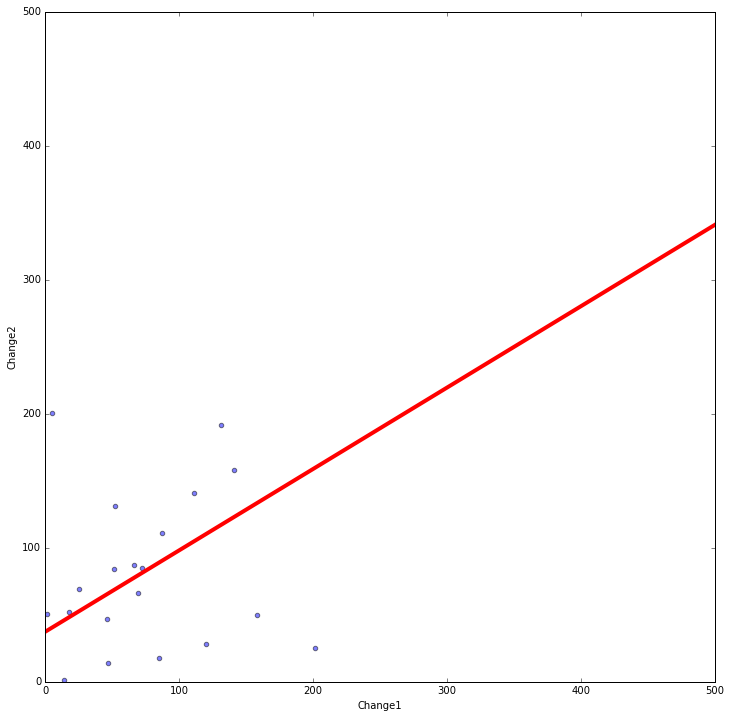

In [72]:
ax = plt.gca()
# Plots the scatter plot
ax2 = ind_prof.plot(kind='scatter', x='Change1', y='Change2', xlim=(0,500), ylim=(0,500), alpha=0.5, ax = ax)

# Run the regression and get the parameters
b = model.params["Intercept"]
a = model.params["Change1"]

# Plot the regression fit line into the scatterplot
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)

In [73]:
ind_prof["Prediction"] = pd.to_numeric(model.fittedvalues).astype(int)
#demo_table.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


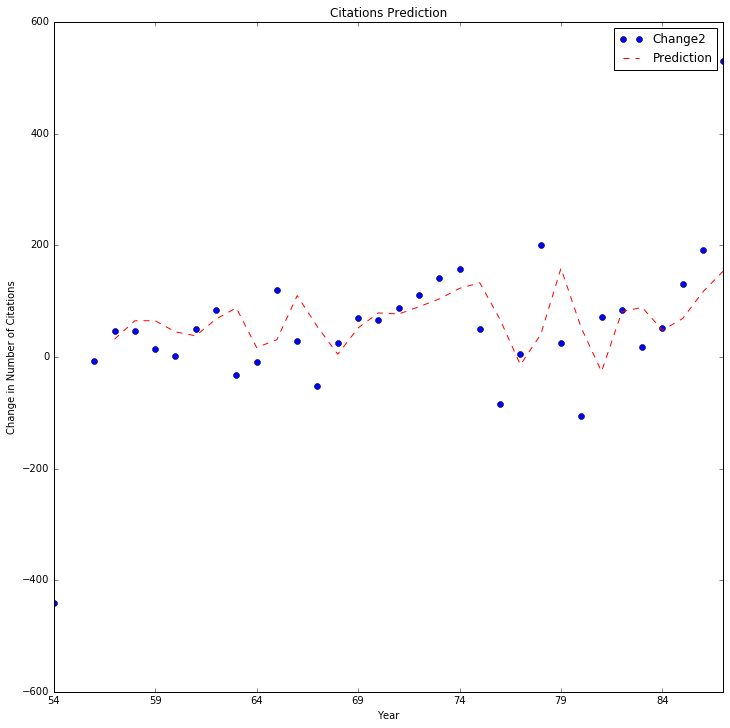

In [75]:
# Plotting the actual data and the prediction
ind_prof[["Change2","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Change in Number of Citations")
plt.title("Citations Prediction")

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


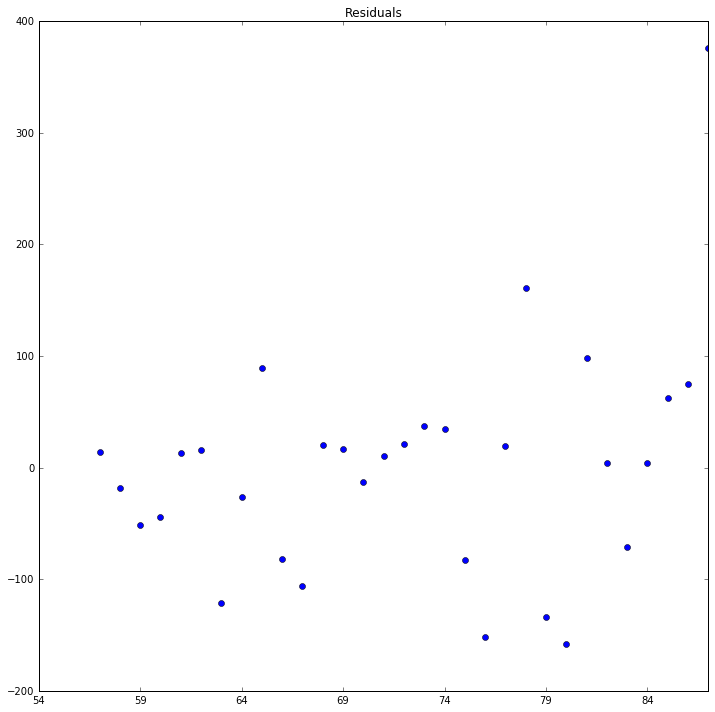

In [77]:
ind_prof["Residuals"] = ind_prof["Change2"] - ind_prof["Prediction"]
# Plotting the residuals
ind_prof["Residuals"].plot(style='bo')
plt.title("Residuals")

#### Testing model if Change in citations can predict Current_Citations - not helpful

In [78]:
model_last_year = sm.ols(formula="Current_Citations ~ Change2 + Change1", data=professors).fit()
model_last_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 2.605e+04
Date:                Mon, 09 May 2016   Prob (F-statistic):               0.00
Time:                        17:44:20   Log-Likelihood:            -3.4860e+05
No. Observations:               42594   AIC:                         6.972e+05
Df Residuals:                   42591   BIC:                         6.972e+05
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    242.4659      4.570     53.054      0.000       233.508   251.424
Change2       -0.3594      0.021    -17.214      0.000        -0.400    -0.318
Change1        3.8871      0.025    157.804      0.000         3.839     3.935
==============================================================================
Omnibus:                    52232.588   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13400012.087
Skew:                           6.443   Prob(JB):                         0.00
Kurtosis:                      88.932   Cond. No.                         459.
==============================================================================
"""

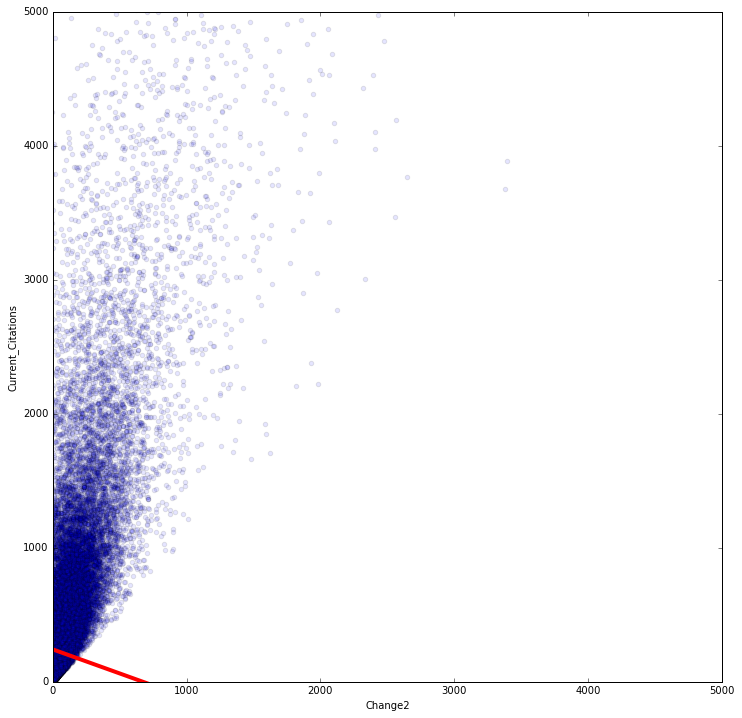

In [79]:
#scatter plot of Last2 citations and Last citations

ax = plt.gca()
# Plots the scatter plot
ax2 = professors.plot(kind='scatter', x='Change2', y='Current_Citations', xlim=(0,5000), ylim=(0,5000), alpha=0.1, ax = ax)

# Run the regression and get the parameters
b = model_last_year.params["Intercept"]
a = model_last_year.params["Change2"]

# Plot the regression fit line into the scatterplot
import numpy as np
# Get the minimum and maximum of the x-axis for the existing scatterplot
x_min = ax2.get_xlim()[0]
x_max = ax2.get_xlim()[1]
# Create a list of numbers for the x-axis, going from x_min to x_max, with 100 points in between
x = np.linspace(x_min, x_max, 100)

# Plot a line, with red color 
plt.plot(x, a*x + b, color='r', linewidth=4)

In [82]:
ind_prof["Prediction"] = pd.to_numeric(model_last_year.fittedvalues).astype(int)
#demo_table.set_index(keys="Year", inplace=True)

/home/nbcommon/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


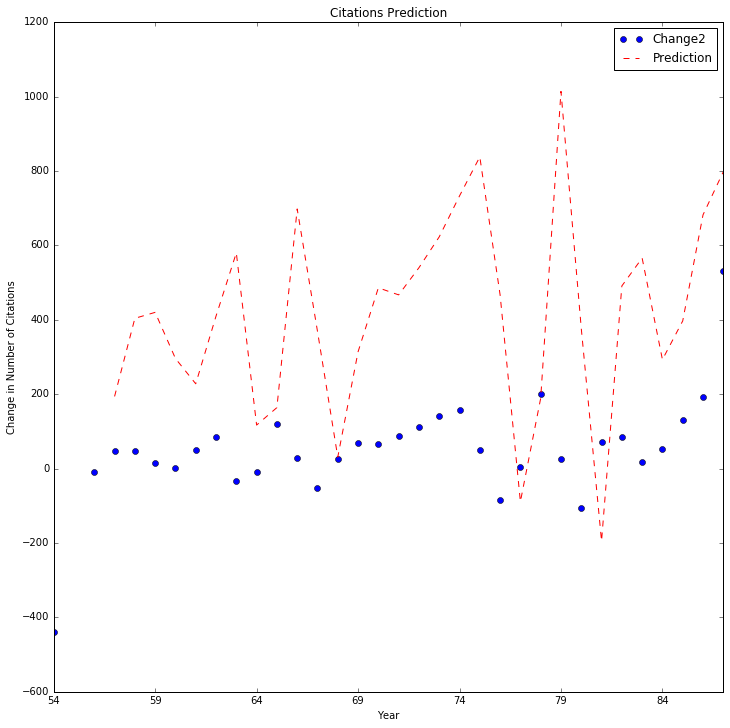

In [83]:
# Plotting the actual data and the prediction
ind_prof[["Change2","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])
plt.xlabel("Year")
plt.ylabel("Change in Number of Citations")
plt.title("Citations Prediction")